# **Exploratory Data Analysis (EDA)**

### **Import necessary libraries**

In [3]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
import numpy as np


### **Define train and test directory**

In [5]:
# train_dir="../input/signature-verification-dataset-iraninan/train"
# test_dir="../input/signature-verification-dataset-iraninan/test"

train_dir="../input/signature-verification-dataset/sign_data/train"
test_dir="../input/signature-verification-dataset/sign_data/test"

### **Create a function to load the images**

In [6]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [7]:
# train
Class_names1_train = set()
trainpath = train_dir
for dirname in os.listdir(trainpath):
    if 'g' not in dirname:
        Class_names1_train.add(dirname)
print("Class_names1_train1:",len(Class_names1_train))
# train
Class_names2_train = set()
trainpath = train_dir
for dirname in os.listdir(trainpath):
    if 'g' in dirname:
        Class_names2_train.add(dirname)
print("Class_names2_train",len(Class_names2_train))
# test
Class_names1_test = set()
trainpath = test_dir
for dirname in os.listdir(trainpath):
    if 'g' not in dirname:
        Class_names1_test.add(dirname)
print("Class_names1_test",len(Class_names1_test))
# test
Class_names2_test = set()
trainpath = test_dir
for dirname in os.listdir(trainpath):
    if 'g' not in dirname:
        Class_names2_test.add(dirname)
print("Class_names2_test",len(Class_names2_test))

Class_names1_train1: 64
Class_names2_train 64
Class_names1_test 21
Class_names2_test 21


In [8]:
freq= {}
directory='../input/'
categories=['signature-verification-dataset-iraninan/train/']
for category in categories:
    path = os.path.join(directory,category)
    for dirname in os.listdir(path):
        if 'f' not in dirname:
            count = 0
            for img in os.listdir(path+dirname):
                count+=1
                freq[dirname] = count
                
freq

{'47': 18,
 '17': 18,
 '19': 18,
 '22': 18,
 '35': 18,
 '07': 18,
 '10': 18,
 '36': 18,
 '45': 18,
 '41': 18,
 '39': 18,
 '32': 18,
 '25': 18,
 '42': 19,
 '38': 18,
 '12': 18,
 '04': 18,
 '31': 18,
 '34': 18,
 '18': 18,
 '28': 18,
 '16': 18,
 '13': 18,
 '08': 18,
 '15': 18,
 '43': 18,
 '09': 18,
 '30': 18,
 '14': 18,
 '46': 18,
 '44': 24,
 '40': 18,
 '11': 18,
 '37': 18,
 '33': 18,
 '29': 18}

In [9]:
freq= {}
directory='../input/'
categories=['signature-verification-dataset-iraninan/test/']
for category in categories:
    path = os.path.join(directory,category)
    for dirname in os.listdir(path):
        if 'f' not in dirname:
            count = 0
            for img in os.listdir(path+dirname):
                count+=1
                freq[dirname] = count
                
freq

{'23': 18,
 '05': 18,
 '20': 18,
 '06': 18,
 '27': 18,
 '02': 18,
 '26': 18,
 '03': 18,
 '21': 18,
 '24': 18}

### **Load the images** 

### **Determine the number of images in each dataset**

### **Create training and test data**

In [12]:
SIZE = 224

In [13]:
def find_files_in_folder(path, folder_name):
    folder_path = None
    for root, dirs, files in os.walk(path):
        if folder_name in dirs:
            folder_path = os.path.join(root, folder_name)
            break
    img1 = []
    if folder_path:
        files = os.listdir(folder_path)
        for file in files:
            folder_name = os.path.dirname(file)
            file_name = os.path.basename(file)
            img1.append(file_name)
        return img1
    else:
        return None
    

train_data_names = []
test_data_names = []

train_data = []
train_labels = []

real_images = []
forged_images = []

for per in os.listdir(train_dir):
    for data in glob.glob(train_dir+'/'+per+'/*.*'):
        
        train_data_names.append(data)
        
        if per[-1]=='g':
            img = cv2.imread(data)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (SIZE,SIZE))
            forged_images.append([img])
#             train_labels.append(np.array(1))
        else:
            img = cv2.imread(data)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (SIZE,SIZE))
            real_images.append([img])
#             train_labels.append(np.array(0))

# train_data = np.array(train_data)/255.0
# train_labels = np.array(train_labels)
print("number of real_images",len(real_images))
#Test Data

test_data = []
test_labels = []

for per in os.listdir(test_dir):
    for data in glob.glob(test_dir+'/'+per+'/*.*'):
        test_data_names.append(data)
        
        if per[-1]=='g':
            img = cv2.imread(data)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (SIZE,SIZE))
            forged_images.append([img])
#             test_labels.append(np.array(1))
        else:
            img = cv2.imread(data)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (SIZE,SIZE))
            real_images.append([img])
#             test_labels.append(np.array(0))

# test_data = np.array(test_data)/255.0
# test_labels = np.array(test_labels)



# # Load the real signature images

# for filename in os.listdir(train_dir):
#     for file in filename:
#         files_in_folder = find_files_in_folder(train_dir, file)
#         if "-f" in file:
#             forged_images.append(file)
#         else:
#             real_images.append(file)
#     image = cv2.imread(os.path.join(train_dir, filename))
#     if image is not None:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image = cv2.resize(image, (224, 224))
#         real_images.append(image)

# # Load the forged signature images

# for filename in os.listdir(test_dir):
#     for file in filename:
#         files_in_folder = find_files_in_folder(test_dir, file)
#         if "-f" in file:
#             forged_images.append(file)
#         else:
#             real_images.append(file)
#     image = cv2.imread(os.path.join(forged_path, filename))
#     if image is not None:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image = cv2.resize(image, (224, 224))
#         forged_images.append(image)

# Convert the images to numpy arrays
real_images = np.array(real_images)
forged_images = np.array(forged_images)

# Create the labels (0 for real, 1 for forged)
real_labels = np.zeros((real_images.shape[0], 1))
forged_labels = np.ones((forged_images.shape[0], 1))

print("number of real_images",len(real_images))
print("number of forged_images",len(forged_images))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

number of real_images 887


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

number of real_images 1139
number of forged_images 1010


libpng warning: iCCP: known incorrect sRGB profile


### **Dump training and testing filenames to a pickle file**

In [14]:
with open('./train_data_names.pkl', 'wb') as fp:
    pickle.dump(train_data_names, fp)

with open('./test_data_names.pkl', 'wb') as fp:
    pickle.dump(test_data_names, fp)

### **Prepare training and test data**

In [15]:
# Categorical labels
# print(train_labels.shape)
# train_labels = to_categorical(train_labels)
# print(train_data.shape)
# Reshaping
# train_data = train_data.reshape(-1, SIZE, 2)
# test_data = test_data.reshape(-1, SIZE, 3)
# print(train_data.shape[0])
# print(test_data.shape[0])
# train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
# test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
# print(train_data.shape)
# print(test_data.shape)

# Concatenate the real and forged images and labels
images = np.concatenate((real_images, forged_images))
labels = np.concatenate((real_labels, forged_labels))

# Split the data into training and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(1719, 1, 224, 224)
(430, 1, 224, 224)


In [16]:
print(train_labels.shape)

(1719, 1)


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# load the data
#(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()


train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.LSTM(256, input_shape=(train_data.shape[1], train_data.shape[2])),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               492544    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 493,058
Trainable params: 493,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 1, 224, 224)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 224, 224), dtype=float32)
      • training=True
      • mask=None


## **Recurrent Neural Networks (RNN)**

### **Train the model**

## **Bi-directional Recurrent Neural Network (B-RNN)**

## **Convolutional Recurrent Neural Network (CRNN)**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 216, 16)      1312      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 104, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)      

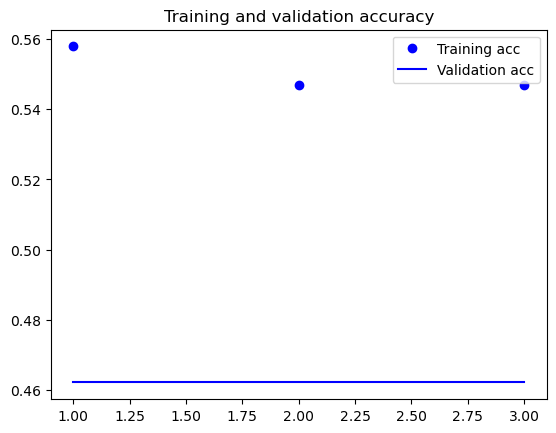

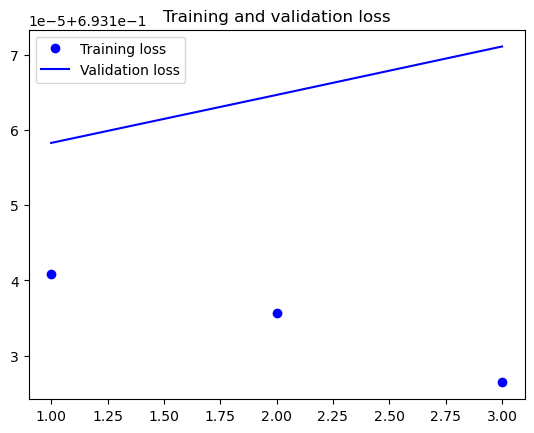

In [18]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
# (train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()


# preprocess the data
train_data = train_data.reshape((train_data.shape[0], 224, 224, 1))
test_data = test_data.reshape((test_data.shape[0], 224, 224, 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Conv2D(16, (9, 9), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=64, epochs=3, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

14/14 [==============================] - 5s 353ms/step - loss: 0.6931 - accuracy: 0.5326
Final Loss: 69.31%
Final Accuracy: 53.26%


In [21]:
model.save('CRNN-2.h5')